In [1]:
from utils.ifa_meander_project.ifa_meander_utils import *
from utils.ifa_meander_project.ifa_creation_functions import *
from utils.ifa_meander_project.ifa_meander_gmsh import *
from utils.ifa_meander_project.meander_plot import *
from utils.ifa_meander_project.meander_simulation_functions_version4 import *
import time

In [2]:
mesh_name = "ifa_meander_2.msh"
save_mesh_folder = 'data/gmsh_files/'
ifa_meander_mat = 'data/antennas_mesh/ifa_meander_2.mat'
ifa_meander_msh = save_mesh_folder + mesh_name

fC      = 868e6
fLow    = 820e6
fHigh   = 940e6

nPoints = calculate_nPoints(fLow, fHigh, fC)
accuracy= 0.01
print(f"nPoints = {nPoints}")

In [3]:
fC      = 868e6  # fr√©quence centrale en Hz
delta_f = 4e6  # √©cart entre les √©chantillons en Hz
print(f"delta_f = {delta_f/1e6:.2f} MHz")
nPoints = 21     # nombre d'√©chantillons

fLow, fHigh, frequencies = calc_frequencies(fC, delta_f, nPoints)
print(f"fLow = {fLow/1e6:.2f} MHz, fHigh = {fHigh/1e6:.2f} MHz, nPoints = {nPoints}")
print("Liste des frequences :")
for i, frequency in enumerate(frequencies, 1):
    print(f"Simulation Num√©ro {i} = {frequency / 1e6:.2f} MHz")

fc_index = np.where(frequencies == fC)[0][0]
print(f"Index de la fr√©quence centrale {fC/1e6:.2f} MHz : {fc_index}")

delta_f = 4.00 MHz
fLow = 828.00 MHz, fHigh = 908.00 MHz, nPoints = 21
Liste des frequences :
Simulation Num√©ro 1 = 828.00 MHz
Simulation Num√©ro 2 = 832.00 MHz
Simulation Num√©ro 3 = 836.00 MHz
Simulation Num√©ro 4 = 840.00 MHz
Simulation Num√©ro 5 = 844.00 MHz
Simulation Num√©ro 6 = 848.00 MHz
Simulation Num√©ro 7 = 852.00 MHz
Simulation Num√©ro 8 = 856.00 MHz
Simulation Num√©ro 9 = 860.00 MHz
Simulation Num√©ro 10 = 864.00 MHz
Simulation Num√©ro 11 = 868.00 MHz
Simulation Num√©ro 12 = 872.00 MHz
Simulation Num√©ro 13 = 876.00 MHz
Simulation Num√©ro 14 = 880.00 MHz
Simulation Num√©ro 15 = 884.00 MHz
Simulation Num√©ro 16 = 888.00 MHz
Simulation Num√©ro 17 = 892.00 MHz
Simulation Num√©ro 18 = 896.00 MHz
Simulation Num√©ro 19 = 900.00 MHz
Simulation Num√©ro 20 = 904.00 MHz
Simulation Num√©ro 21 = 908.00 MHz
Index de la fr√©quence centrale 868.00 MHz : 10


In [4]:
vitesse_lumiere = 3.0e8  # en m√®tres par seconde (m/s)
longueur_onde = vitesse_lumiere / fC 
quart_d_onde = longueur_onde / 4

print(f"Pour la fr√©quence de raisonnance {fC} Hz :")
print(f"Longueur d'onde (Œª) = {longueur_onde} m")
print(f"Quart d'onde (Œª/4) = {quart_d_onde} m")

Pour la fr√©quence de raisonnance 868000000.0 Hz :
Longueur d'onde (Œª) = 0.3456221198156682 m
Quart d'onde (Œª/4) = 0.08640552995391705 m


In [5]:
# Terminal size 
t_a = 60 / 1000   # Hauteur
a = 20 / 1000 
t_b = 40 / 1000  # Largeur
b = t_b
x_t = np.array([-t_a, 0, 0, -t_a])
y_t = np.array([t_b, t_b, 0, 0])

In [6]:
wid = 1 / 1000    
feed_wid = wid

# L_short = 1.25 / 1000
L_short = 3.45 / 1000
Lenght_antenna = quart_d_onde

# feed = t_b/2
# feed = 0.75 * t_b
feed = 26.25 / 1000        # yeah √ßa marche bien apres 2 iteration avec 26.25 mm
# feed = 21.15 / 1000      # Yeah √ßa marche bien apres 1 iteration avec 21.15 mm
feed_point = [0, feed, 0]

x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)
# conditionnement pour la distance entre les meandres
""" if distance_meandre < 0.5 / 1000 + wid:
    print(f"Attention, la distance entre les meandres ({distance_meandre}) est trop petite par rapport √† la largeur ({wid}).")
    print("Ajustement de la longueur de l'antenne pour respecter la condition.")
    L_short = 1.5 * wid
    x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short) """

x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

In [7]:
Find_good_number_of_meanders = False
Find_good_width_of_meanders = False

x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)
x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

print(f"Wid meandree = {wid}")
print(f"L_short = {L_short}")
print(f"feed_Position = {feed}")
print(f"Nombre de meandres = {Nombre_meandre}")
print(f"Distance entre les meandres = {distance_meandre}")

extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)

# Mesure le temps de calcul
start_time = time.time()

# Simulation de la courbe S11 et des imp√©dances
s11_db, impedances, R_res, X_res, f_resonance, min_index = simulate_frequency_sweep(frequencies, fC, ifa_meander_mat, feed_point)
end_time = time.time()
elapsed_time_sec = end_time - start_time
elapsed_time_min = elapsed_time_sec / 60
print(f"Temps de calcul pour la simulation : {elapsed_time_sec:.2f} secondes ({elapsed_time_min:.2f} minutes)")

# Affichage des r√©sultats
plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

ratio_res_over_coupure = f_resonance / fC
#affiche le ratio_res_over_coupure
print(f"Ratio de la fr√©quence de r√©sonance sur la fr√©quence de coupure : {ratio_res_over_coupure:.2f}")

# si la frequence de resonance est entre fLow et fHigh
if fLow < f_resonance and f_resonance < fHigh:
    print(f"La fr√©quence de r√©sonance {f_resonance/1e6:.2f} MHz est entre fLow et fHigh.")
    Find_good_number_of_meanders = True
    if s11_db[min_index] < -10.0:
        print(f"La courbe S11 est inf√©rieure √† -10 dB √† la fr√©quence de r√©sonance {f_resonance/1e6:.2f} MHz.")
        Find_good_positon_of_feed = True

    if s11_db[min_index] < -20.0:
        print(f"La courbe S11 est inf√©rieure √† -20 dB √† la fr√©quence de r√©sonance {f_resonance/1e6:.2f} MHz.")


if f_resonance == fLow or f_resonance == fHigh and not Find_good_number_of_meanders:
    # multiplier le nombre de meanders par le ratio
    Nombre_meandre = int(np.ceil(Nombre_meandre * ratio_res_over_coupure))
    print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")

elif f_resonance > fLow or f_resonance < fHigh and not Find_good_width_of_meanders:
    Find_good_number_of_meanders = True
    # Nous somme dass le cas o√π la fr√©quence de r√©sonance est entre fLow et fHigh
    print(f"La fr√©quence de r√©sonance {f_resonance/1e6:.2f} MHz est entre fLow et fHigh.")
    # print on ajuste le width of meanders legerement
    wid = wid * ratio_res_over_coupure**2
    

x, y = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)
    

# Premier code d'optimisation

max_iterations = 15
Z0 = 50  # Imp√©dance caract√©ristique de la ligne
iteration = 0
has_converged = False

Nombre_meandre = 6

# x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)
x, y, distance_meandre = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)

while not has_converged and iteration < max_iterations:
    x_m, y_m = trace_meander_new(x, y, wid)
    feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

    print(f"\nIt√©ration {iteration + 1}")
    print(f"Wid meandree = {wid*1000} mm")
    print(f"L_short = {L_short*1000} mm")
    print(f"feed_Position = {feed*1000} mm")
    print(f"Nombre de meandres = {Nombre_meandre}")
    print(f"Distance entre les meandres = {distance_meandre*1000} mm")
    # Afficher etat de Find_good_number_of_meanders et Find_good_width_of_meanders
    print(f"Find_good_number_of_meanders = {Find_good_number_of_meanders}")
    print(f"Find_good_width_of_meanders = {Find_good_width_of_meanders}")

    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)

    start_time = time.time()
    s11_db, impedances, R_res, X_res, f_resonance, min_index = simulate_frequency_sweep(frequencies, fC, ifa_meander_mat, feed_point)
    end_time = time.time()
    elapsed_time_sec = end_time - start_time
    elapsed_time_min = elapsed_time_sec / 60
    print(f"Temps de calcul pour la simulation : {elapsed_time_sec:.2f} secondes ({elapsed_time_min:.2f} minutes)")

    plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
    plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

    ratio_res_over_coupure = f_resonance / fC
    print(f"Ratio de la fr√©quence de r√©sonance sur la fr√©quence de coupure : {ratio_res_over_coupure:.5f}")

    if abs(1 - ratio_res_over_coupure) > 0.006:
            print("La fr√©quence de r√©sonance est √©loign√©e de la fr√©quence centrale.")
            Find_good_width_of_meanders = False
            Find_good_number_of_meanders = False

    # Si la frequence de resonance est dans l'intervalle [fLow, fHigh] et que la largeur des meandres n'est pas encore trouv√©e
    if fLow < f_resonance and f_resonance < fHigh and not Find_good_width_of_meanders:
        print("cas 0")
        print(f"La fr√©quence de r√©sonance {f_resonance/1e6:.2f} MHz est entre fLow et fHigh.")
        Find_good_number_of_meanders = True
        if abs(1 - ratio_res_over_coupure) < 0.005:
            print("La fr√©quence de r√©sonance est √©gale ou proche √† la fr√©quence centrale.")
            Find_good_width_of_meanders = True
        else:
            # wid = wid / ratio_res_over_coupure**2
            if f_resonance < fC:
                wid = wid / ratio_res_over_coupure**2
            else:
                wid = wid * ratio_res_over_coupure**2
                

    # Si la fr√©quence de r√©sonance est √©gale √† fLow ou fHigh, on ajuste le nombre de meandres
    if (f_resonance == fLow or f_resonance == fHigh) and not Find_good_number_of_meanders:
        print("cas 1")
        print(f"La fr√©quence de r√©sonance {f_resonance/1e6:.2f} MHz est √©gale √† fLow ou fHigh.")
        Find_good_number_of_meanders = False
        Find_good_width_of_meanders = False
        if f_resonance == fLow:
            print("La fr√©quence de r√©sonance est √©gale √† fLow.")
            Nombre_meandre = int(Nombre_meandre * ratio_res_over_coupure)
        else:
            Nombre_meandre = int(np.ceil(Nombre_meandre * ratio_res_over_coupure))
        print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")

    # Si la fr√©quence de r√©sonance est dans l'intervalle [fLow, fHigh] et que la largeur des meandres et le nombre de meandre sont trouv√©e et que la position du feed n'est pas encore trouv√©e
    if Find_good_number_of_meanders and Find_good_width_of_meanders:
        print("cas 2")        
        print("Recherche de la position du feed...")
        if s11_db[min_index] < -10.0 and abs(1 - ratio_res_over_coupure) < 0.005:
            print(f"La courbe S11 est inf√©rieure √† -10 dB √† la fr√©quence de r√©sonance {f_resonance/1e6:.2f} MHz.")
            print("La fr√©quence de r√©sonance est √©gale ou proche √† la fr√©quence centrale.")
            has_converged = True
        else:
            print("cas 2.2")
            # wid = wid * ratio_res_over_coupure**2
            print(f"(50 / R_res) : {50 / R_res} mm")
            if f_resonance < fC:
                wid = wid / ratio_res_over_coupure**2
                feed = feed / (Z0 / R_res)**2
            else:
                wid = wid * ratio_res_over_coupure**2
                feed = feed * (Z0 / R_res)**2
            # feed = feed * (Z0 / R_res)**2
            # feed = feed + 3 / 1000
            if feed >= b - 3 * wid:
                feed = b - 3 * wid
            if feed <= wid / 2:
                feed = wid / 2
            feed_point = [0, feed, 0]
        
            
    x, y, distance_meandre = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    
    iteration += 1


Number of meanders 1
distance meandres 16.549999999999997 mm

It√©ration 1
Wid meandree = 1.0 mm
L_short = 3.45 mm
feed_Position = 26.25 mm
Nombre de meandres = 1
Distance entre les meandres = 16.549999999999997 mm
Simulation 1/21 | f = 828.00 MHz | S11 = -0.61 dB
Simulation 2/21 | f = 832.00 MHz | S11 = -0.65 dB
Simulation 3/21 | f = 836.00 MHz | S11 = -0.69 dB
Simulation 4/21 | f = 840.00 MHz | S11 = -0.74 dB
Simulation 5/21 | f = 844.00 MHz | S11 = -0.79 dB
Simulation 6/21 | f = 848.00 MHz | S11 = -0.84 dB
Simulation 7/21 | f = 852.00 MHz | S11 = -0.89 dB
Simulation 8/21 | f = 856.00 MHz | S11 = -0.96 dB
Simulation 9/21 | f = 860.00 MHz | S11 = -1.02 dB
Simulation 10/21 | f = 864.00 MHz | S11 = -1.09 dB


Simulation 11/21 | f = 868.00 MHz | S11 = -1.17 dB
Simulation 12/21 | f = 872.00 MHz | S11 = -1.25 dB
Simulation 13/21 | f = 876.00 MHz | S11 = -1.34 dB
Simulation 14/21 | f = 880.00 MHz | S11 = -1.44 dB
Simulation 15/21 | f = 884.00 MHz | S11 = -1.55 dB
Simulation 16/21 | f = 888.00 MHz | S11 = -1.67 dB
Simulation 17/21 | f = 892.00 MHz | S11 = -1.80 dB
Simulation 18/21 | f = 896.00 MHz | S11 = -1.94 dB
Simulation 19/21 | f = 900.00 MHz | S11 = -2.09 dB
Simulation 20/21 | f = 904.00 MHz | S11 = -2.25 dB
Simulation 21/21 | f = 908.00 MHz | S11 = -2.44 dB

üì° R√©sultats de simulation :
‚Üí Fr√©quence de r√©sonance = 908.00 MHz
‚Üí Imp√©dance √† f_res      = 358.44+8.55j Œ©
‚Üí Imp√©dance √† fC         = 114.37+264.31j Œ©
‚Üí S11 √† f_res            = -2.44 dB
Temps de calcul pour la simulation : 334.78 secondes (5.58 minutes)


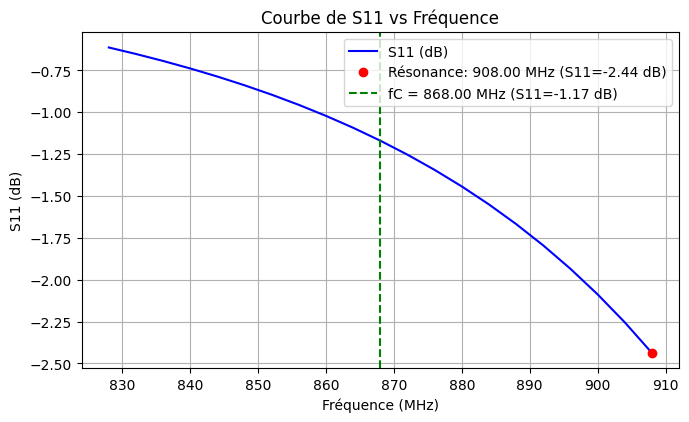

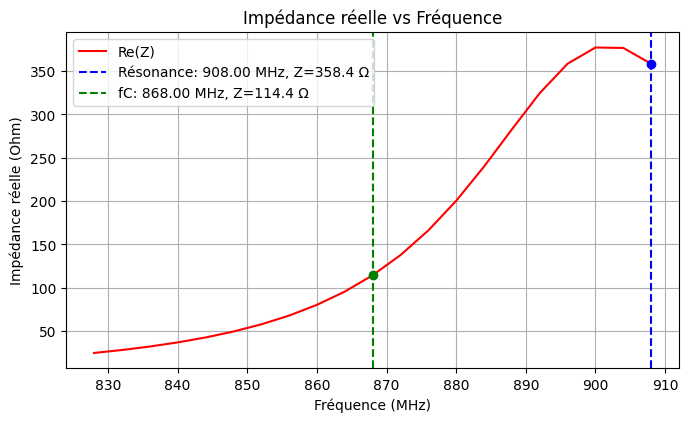

Ratio f_resonance / fC : 1.04608
Erreur relative : 0.04608
La fr√©quence de r√©sonance est √©gale √† fHigh.
Le nouveau nombre de meanders est 2.
La fr√©quence de r√©sonance est inf√©rieure √† fHigh.
Number of meanders 2
distance meandres 8.274999999999999 mm

It√©ration 2
Wid meandree = 1.0460829493087558 mm
L_short = 3.45 mm
feed_Position = 24.25 mm
Nombre de meandres = 2
Distance entre les meandres = 8.274999999999999 mm
Simulation 1/21 | f = 828.00 MHz | S11 = -9.95 dB
Simulation 2/21 | f = 832.00 MHz | S11 = -10.03 dB
Simulation 3/21 | f = 836.00 MHz | S11 = -9.72 dB
Simulation 4/21 | f = 840.00 MHz | S11 = -9.11 dB
Simulation 5/21 | f = 844.00 MHz | S11 = -8.37 dB
Simulation 6/21 | f = 848.00 MHz | S11 = -7.59 dB
Simulation 7/21 | f = 852.00 MHz | S11 = -6.84 dB
Simulation 8/21 | f = 856.00 MHz | S11 = -6.15 dB
Simulation 9/21 | f = 860.00 MHz | S11 = -5.53 dB
Simulation 10/21 | f = 864.00 MHz | S11 = -4.98 dB


Simulation 11/21 | f = 868.00 MHz | S11 = -4.50 dB
Simulation 12/21 | f = 872.00 MHz | S11 = -4.08 dB
Simulation 13/21 | f = 876.00 MHz | S11 = -3.71 dB
Simulation 14/21 | f = 880.00 MHz | S11 = -3.38 dB
Simulation 15/21 | f = 884.00 MHz | S11 = -3.10 dB
Simulation 16/21 | f = 888.00 MHz | S11 = -2.84 dB
Simulation 17/21 | f = 892.00 MHz | S11 = -2.62 dB
Simulation 18/21 | f = 896.00 MHz | S11 = -2.42 dB
Simulation 19/21 | f = 900.00 MHz | S11 = -2.25 dB
Simulation 20/21 | f = 904.00 MHz | S11 = -2.09 dB
Simulation 21/21 | f = 908.00 MHz | S11 = -1.95 dB

üì° R√©sultats de simulation :
‚Üí Fr√©quence de r√©sonance = 832.00 MHz
‚Üí Imp√©dance √† f_res      = 29.03-14.16j Œ©
‚Üí Imp√©dance √† fC         = 15.08+20.93j Œ©
‚Üí S11 √† f_res            = -10.03 dB
Temps de calcul pour la simulation : 543.48 secondes (9.06 minutes)


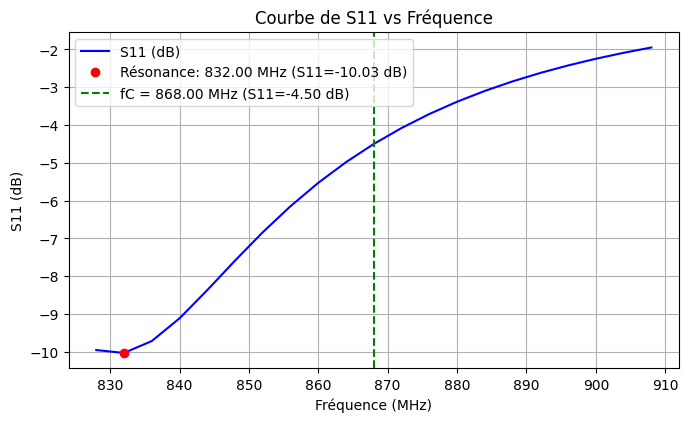

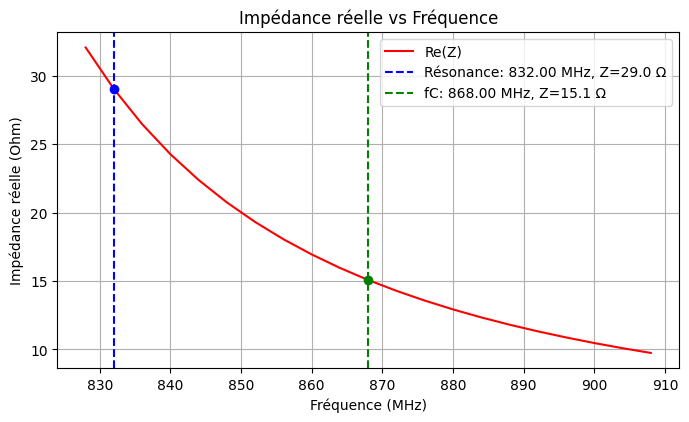

Ratio f_resonance / fC : 0.95853
Erreur relative : 0.04147
La fr√©quence de r√©sonance est superieur fLow.
Number of meanders 2
distance meandres 8.274999999999999 mm

It√©ration 3
Wid meandree = 1.091346153846154 mm
L_short = 3.45 mm
feed_Position = 22.25 mm
Nombre de meandres = 2
Distance entre les meandres = 8.274999999999999 mm
Simulation 1/21 | f = 828.00 MHz | S11 = -7.81 dB
Simulation 2/21 | f = 832.00 MHz | S11 = -8.65 dB
Simulation 3/21 | f = 836.00 MHz | S11 = -9.40 dB
Simulation 4/21 | f = 840.00 MHz | S11 = -9.95 dB
Simulation 5/21 | f = 844.00 MHz | S11 = -10.18 dB
Simulation 6/21 | f = 848.00 MHz | S11 = -10.04 dB
Simulation 7/21 | f = 852.00 MHz | S11 = -9.58 dB
Simulation 8/21 | f = 856.00 MHz | S11 = -8.92 dB
Simulation 9/21 | f = 860.00 MHz | S11 = -8.18 dB
Simulation 10/21 | f = 864.00 MHz | S11 = -7.44 dB


Simulation 11/21 | f = 868.00 MHz | S11 = -6.73 dB
Simulation 12/21 | f = 872.00 MHz | S11 = -6.08 dB
Simulation 13/21 | f = 876.00 MHz | S11 = -5.51 dB
Simulation 14/21 | f = 880.00 MHz | S11 = -4.99 dB
Simulation 15/21 | f = 884.00 MHz | S11 = -4.53 dB
Simulation 16/21 | f = 888.00 MHz | S11 = -4.13 dB
Simulation 17/21 | f = 892.00 MHz | S11 = -3.77 dB
Simulation 18/21 | f = 896.00 MHz | S11 = -3.46 dB
Simulation 19/21 | f = 900.00 MHz | S11 = -3.18 dB
Simulation 20/21 | f = 904.00 MHz | S11 = -2.93 dB
Simulation 21/21 | f = 908.00 MHz | S11 = -2.71 dB

üì° R√©sultats de simulation :
‚Üí Fr√©quence de r√©sonance = 844.00 MHz
‚Üí Imp√©dance √† f_res      = 29.59-14.55j Œ©
‚Üí Imp√©dance √† fC         = 19.59+11.46j Œ©
‚Üí S11 √† f_res            = -10.18 dB
Temps de calcul pour la simulation : 615.94 secondes (10.27 minutes)


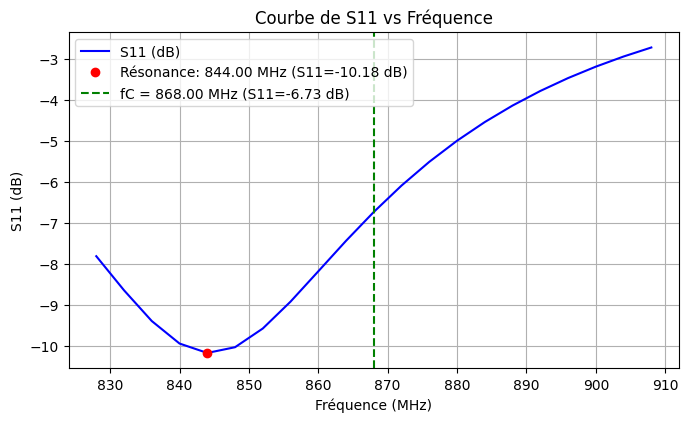

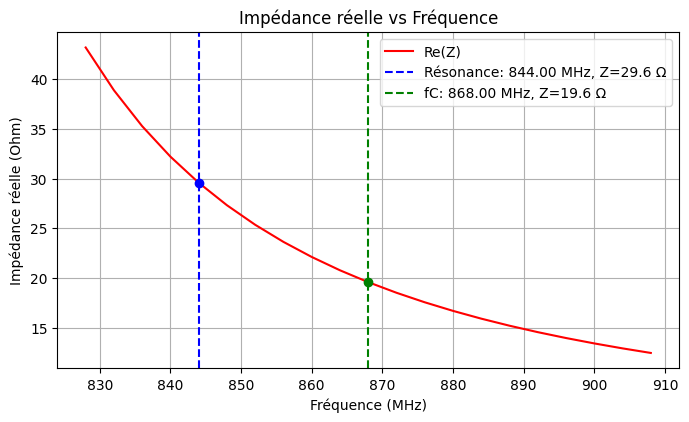

Ratio f_resonance / fC : 0.97235
Erreur relative : 0.02765
La fr√©quence de r√©sonance est superieur fLow.
Number of meanders 2
distance meandres 8.274999999999999 mm

It√©ration 4
Wid meandree = 1.1223796937659498 mm
L_short = 3.45 mm
feed_Position = 20.249999999999996 mm
Nombre de meandres = 2
Distance entre les meandres = 8.274999999999999 mm
Simulation 1/21 | f = 828.00 MHz | S11 = -5.67 dB
Simulation 2/21 | f = 832.00 MHz | S11 = -6.38 dB
Simulation 3/21 | f = 836.00 MHz | S11 = -7.15 dB
Simulation 4/21 | f = 840.00 MHz | S11 = -7.97 dB
Simulation 5/21 | f = 844.00 MHz | S11 = -8.79 dB
Simulation 6/21 | f = 848.00 MHz | S11 = -9.55 dB
Simulation 7/21 | f = 852.00 MHz | S11 = -10.12 dB
Simulation 8/21 | f = 856.00 MHz | S11 = -10.40 dB
Simulation 9/21 | f = 860.00 MHz | S11 = -10.31 dB
Simulation 10/21 | f = 864.00 MHz | S11 = -9.91 dB


Simulation 11/21 | f = 868.00 MHz | S11 = -9.29 dB
Simulation 12/21 | f = 872.00 MHz | S11 = -8.57 dB
Simulation 13/21 | f = 876.00 MHz | S11 = -7.83 dB
Simulation 14/21 | f = 880.00 MHz | S11 = -7.11 dB
Simulation 15/21 | f = 884.00 MHz | S11 = -6.45 dB
Simulation 16/21 | f = 888.00 MHz | S11 = -5.86 dB
Simulation 17/21 | f = 892.00 MHz | S11 = -5.32 dB
Simulation 18/21 | f = 896.00 MHz | S11 = -4.84 dB
Simulation 19/21 | f = 900.00 MHz | S11 = -4.42 dB
Simulation 20/21 | f = 904.00 MHz | S11 = -4.04 dB
Simulation 21/21 | f = 908.00 MHz | S11 = -3.71 dB

üì° R√©sultats de simulation :
‚Üí Fr√©quence de r√©sonance = 856.00 MHz
‚Üí Imp√©dance √† f_res      = 29.66-13.51j Œ©
‚Üí Imp√©dance √† fC         = 24.46+0.60j Œ©
‚Üí S11 √† f_res            = -10.40 dB
Temps de calcul pour la simulation : 697.19 secondes (11.62 minutes)


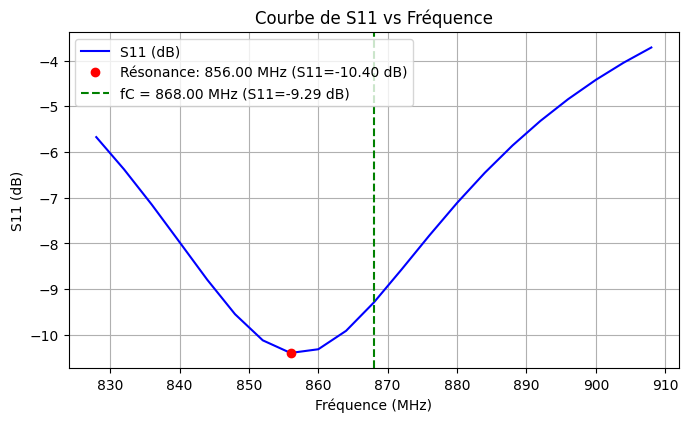

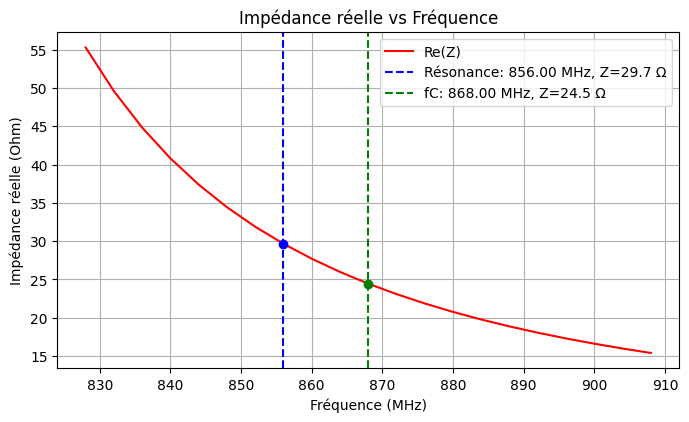

Ratio f_resonance / fC : 0.98618
Erreur relative : 0.01382
La fr√©quence de r√©sonance est superieur fLow.
Number of meanders 2
distance meandres 8.274999999999999 mm

It√©ration 5
Wid meandree = 1.1381139885383698 mm
L_short = 3.45 mm
feed_Position = 18.249999999999996 mm
Nombre de meandres = 2
Distance entre les meandres = 8.274999999999999 mm
Simulation 1/21 | f = 828.00 MHz | S11 = -4.26 dB
Simulation 2/21 | f = 832.00 MHz | S11 = -4.77 dB
Simulation 3/21 | f = 836.00 MHz | S11 = -5.35 dB
Simulation 4/21 | f = 840.00 MHz | S11 = -6.00 dB
Simulation 5/21 | f = 844.00 MHz | S11 = -6.72 dB
Simulation 6/21 | f = 848.00 MHz | S11 = -7.51 dB
Simulation 7/21 | f = 852.00 MHz | S11 = -8.33 dB
Simulation 8/21 | f = 856.00 MHz | S11 = -9.16 dB
Simulation 9/21 | f = 860.00 MHz | S11 = -9.90 dB
Simulation 10/21 | f = 864.00 MHz | S11 = -10.45 dB


Simulation 11/21 | f = 868.00 MHz | S11 = -10.69 dB
Simulation 12/21 | f = 872.00 MHz | S11 = -10.57 dB
Simulation 13/21 | f = 876.00 MHz | S11 = -10.14 dB
Simulation 14/21 | f = 880.00 MHz | S11 = -9.51 dB
Simulation 15/21 | f = 884.00 MHz | S11 = -8.77 dB
Simulation 16/21 | f = 888.00 MHz | S11 = -8.02 dB
Simulation 17/21 | f = 892.00 MHz | S11 = -7.30 dB
Simulation 18/21 | f = 896.00 MHz | S11 = -6.64 dB
Simulation 19/21 | f = 900.00 MHz | S11 = -6.04 dB
Simulation 20/21 | f = 904.00 MHz | S11 = -5.49 dB
Simulation 21/21 | f = 908.00 MHz | S11 = -5.01 dB

üì° R√©sultats de simulation :
‚Üí Fr√©quence de r√©sonance = 868.00 MHz
‚Üí Imp√©dance √† f_res      = 29.47-11.33j Œ©
‚Üí Imp√©dance √† fC         = 29.47-11.33j Œ©
‚Üí S11 √† f_res            = -10.69 dB
Temps de calcul pour la simulation : 557.46 secondes (9.29 minutes)


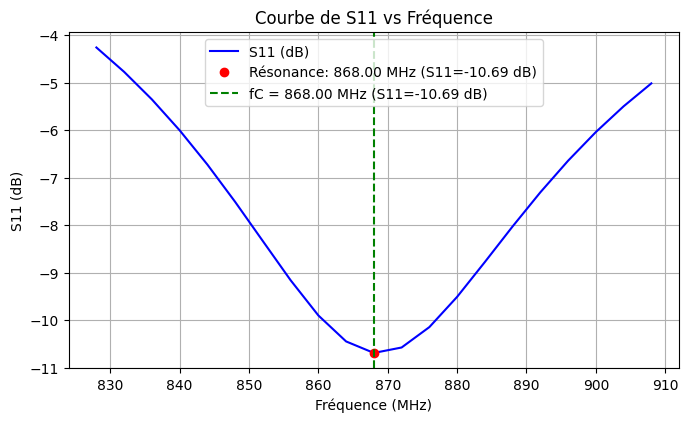

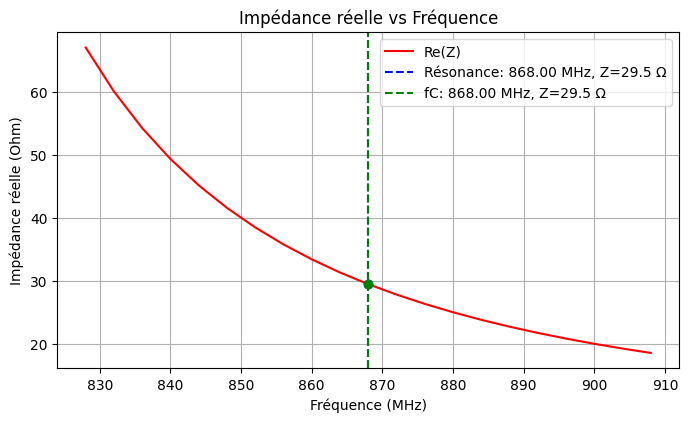

Ratio f_resonance / fC : 1.00000
Erreur relative : 0.00000
On est sous le seuil de l'erreur relative de 0.01, on a trouv√© la fr√©quence de r√©sonance.
Number of meanders 2
distance meandres 8.274999999999999 mm


In [8]:
max_iterations = 15
Z0 = 50  # Imp√©dance caract√©ristique de la ligne
iteration = 0
has_converged = False

# Nombre_meandre = 5

x, y, Nombre_meandre, distance_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)
# x, y, distance_meandre = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)

while not has_converged and iteration < max_iterations:
    x_m, y_m = trace_meander_new(x, y, wid)
    feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

    print(f"\nIt√©ration {iteration + 1}")
    print(f"Wid meandree = {wid*1000} mm")
    print(f"L_short = {L_short*1000} mm")
    print(f"feed_Position = {feed*1000} mm")
    print(f"Nombre de meandres = {Nombre_meandre}")
    print(f"Distance entre les meandres = {distance_meandre*1000} mm")

    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)

    start_time = time.time()
    s11_db, impedances, R_res, X_res, f_resonance, min_index = simulate_frequency_sweep(frequencies, fC, ifa_meander_mat, feed_point)
    end_time = time.time()
    elapsed_time_sec = end_time - start_time
    elapsed_time_min = elapsed_time_sec / 60
    print(f"Temps de calcul pour la simulation : {elapsed_time_sec:.2f} secondes ({elapsed_time_min:.2f} minutes)")

    plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
    plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

    ratio_res_over_coupure = f_resonance / fC
    error = abs((fC - f_resonance) / fC)
    print(f"Ratio f_resonance / fC : {ratio_res_over_coupure:.5f}")
    print(f"Erreur relative : {error:.5f}")

    # Algorithme de correction des param√®tres

    if error < 0.01 and s11_db[fc_index] < -10.0:
        print("On est sous le seuil de l'erreur relative de 0.01, on a trouv√© la fr√©quence de r√©sonance.")
        has_converged = True
    else:
        if f_resonance == fLow:
            print("La fr√©quence de r√©sonance est √©gale √† fLow.")
            Nombre_meandre = int(Nombre_meandre * ratio_res_over_coupure)
            print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")
        elif f_resonance == fHigh:
            print("La fr√©quence de r√©sonance est √©gale √† fHigh.")
            Nombre_meandre = int(np.ceil(Nombre_meandre * ratio_res_over_coupure))
            print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")
        if f_resonance < fC:
            print("La fr√©quence de r√©sonance est superieur fLow.")
            wid = wid / ratio_res_over_coupure
            feed = feed - 2 / 1000
        if fC < f_resonance:
            print("La fr√©quence de r√©sonance est inf√©rieure √† fHigh.")
            wid = wid * ratio_res_over_coupure
            feed = feed - 2 / 1000

    if feed >= b - 3 * wid:
        feed = b - 3 * wid
    if feed <= wid / 2:
        feed = wid / 2
    feed_point = [0, feed, 0]

    """ # Si la frequence de resonance est dans l'intervalle [fLow, fHigh] et que la largeur des meandres n'est pas encore trouv√©e
    if fLow < f_resonance and f_resonance < fHigh and not Find_good_width_of_meanders:
        print("Cas 1")
                
    # Si la fr√©quence de r√©sonance est √©gale √† fLow ou fHigh, on ajuste le nombre de meandres
    if (f_resonance == fLow or f_resonance == fHigh) and not Find_good_number_of_meanders:
        print("cas 1")
        print(f"La fr√©quence de r√©sonance {f_resonance/1e6:.2f} MHz est √©gale √† fLow ou fHigh.")
        Find_good_number_of_meanders = False
        Find_good_width_of_meanders = False
        if f_resonance == fLow:
            print("La fr√©quence de r√©sonance est √©gale √† fLow.")
            Nombre_meandre = int(Nombre_meandre * ratio_res_over_coupure)
        else:
            Nombre_meandre = int(np.ceil(Nombre_meandre * ratio_res_over_coupure))
        print(f"Le nouveau nombre de meanders est {Nombre_meandre}.")

    # Si la fr√©quence de r√©sonance est dans l'intervalle [fLow, fHigh] et que la largeur des meandres et le nombre de meandre sont trouv√©e et que la position du feed n'est pas encore trouv√©e
    if Find_good_number_of_meanders and Find_good_width_of_meanders:
        print("cas 2")        
        print("Recherche de la position du feed...")
        if s11_db[min_index] < -10.0 and abs(1 - ratio_res_over_coupure) < 0.005:
            print(f"La courbe S11 est inf√©rieure √† -10 dB √† la fr√©quence de r√©sonance {f_resonance/1e6:.2f} MHz.")
            print("La fr√©quence de r√©sonance est √©gale ou proche √† la fr√©quence centrale.")
            has_converged = True
        else:
            print("cas 2.2")
            # wid = wid * ratio_res_over_coupure**2
            print(f"(50 / R_res) : {50 / R_res} mm")
            if f_resonance < fC:
                wid = wid / ratio_res_over_coupure**2
                feed = feed / (Z0 / R_res)**2
            else:
                wid = wid * ratio_res_over_coupure**2
                feed = feed * (Z0 / R_res)**2
            # feed = feed * (Z0 / R_res)**2
            # feed = feed + 3 / 1000
            if feed >= b - 3 * wid:
                feed = b - 3 * wid
            if feed <= wid / 2:
                feed = wid / 2
            feed_point = [0, feed, 0] """
        
            
    x, y, distance_meandre = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    
    iteration += 1

Nombre_meandre = 6
wid = 1 / 1000
L_short = 1.5 / 1000

x, y = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
x_m, y_m = trace_meander_new(x, y, wid)
feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed - feed_wid/2])
antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)

def run_ifa_meander_simulation(iteration, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat):
    # Affiche l'iteration
    print(f"\nIteration {iteration + 1}\n")
    print(f"wid = {wid * 1000}")
    print(f"short feed = {distance_short * 1000}\n")
    # x, y = ifa_creation_optimisation(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    x_m, y_m = trace_meander_new(x, y, wid)
    feed_x = np.array([0, L_short-wid/2, L_short-wid/2, 0])
    feed_y = np.array([feed + feed_wid/2, feed + feed_wid/2, feed -feed_wid/2, feed -feed_wid/2])
    antenna_ifa_meander(x_m, y_m, x_t, y_t, feed_x, feed_y, save_mesh_folder, mesh_name, 2.25/1000)
    extract_msh_to_mat(ifa_meander_msh, ifa_meander_mat)


def update_ifa_meander_params(new_distance_short, new_wid, new_Nombre_meandre, t_b):
    distance_short = new_distance_short
    wid = new_wid
    feed = t_b/2 - distance_short
    feed_wid = wid
    feed_point = [0, feed, 0]
    # Si new_Nombre_meandre est None ou non fourni, ne pas le retourner
    if new_Nombre_meandre is not None:
        return distance_short, wid, new_Nombre_meandre, feed, feed_wid, feed_point
    else:
        return distance_short, wid, feed, feed_wid, feed_point


has_converged = False
max_iterations = 15

x, y, Nombre_meandre = ifa_creation_new_v4(Lenght_antenna, a, b, wid, L_short)

# Nombre_meandre = 6

# Loop for simulation
iteration = 0
while not has_converged and iteration < max_iterations:

    run_ifa_meander_simulation(iteration, wid, distance_short, x, y, L_short, feed, feed_wid, x_t, y_t, save_mesh_folder, mesh_name, ifa_meander_msh, ifa_meander_mat)

    s11_db, f_resonance, new_distance_short, new_wid, new_Nombre_meandre, has_converged, impedances = simulate_freq_loop_test_version_3(
        fLow, fHigh, nPoints, fC, accuracy, ifa_meander_mat, feed_point, distance_short, wid, Lenght_antenna, b, a, L_short, Nombre_meandre)
    
    # Remplacement par appel de la fonction update_ifa_meander_params
    distance_short, wid, Nombre_meandre, feed, feed_wid, feed_point = update_ifa_meander_params(new_distance_short, new_wid, new_Nombre_meandre, t_b)

    plot_s11_curve(fLow, fHigh, nPoints, s11_db, fC)
    plot_impedance(fLow, fHigh, nPoints, impedances, s11_db, fC)

    x, y = ifa_creation_optimisation_v4(Lenght_antenna, a, b, wid, Nombre_meandre, L_short)
    iteration += 1


